In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#actions: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

In [3]:
def is_terminal_state(current_row_index, current_column_index):
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

def get_next_action(current_row_index, current_column_index, epsilon):

  if np.random.random() > epsilon:
    return np.argmax(q_values[:,current_row_index, current_column_index])
  else: 
    return np.random.randint(4)

def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

def get_shortest_path(start_row_index, start_column_index):
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: 
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    while not is_terminal_state(current_row_index, current_column_index):
      action_index = get_next_action(current_row_index, current_column_index, 0)
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
      if len(shortest_path) > (environment_rows * environment_columns):
        return shortest_path
    return shortest_path

def draw_shortest_path():
    shortest_path = get_shortest_path(0, 3)

    if shortest_path:
        for i in shortest_path:
            data[i[0], i[1]] = 0.4
    plt.imshow(data, interpolation='nearest', cmap='hot')

[-100. -100. -100.   -1. -100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1. -100.   -1.   -1. -100.   -1. -100.]
[-100.   -1. -100.   -1. -100.   -1. -100. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1. -100.   -1.   -1. -100.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100.]
[-100.   -1. -100.   -1. -100.   -1. -100. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100. -100. -100. -100. -100.  100. -100. -100.]


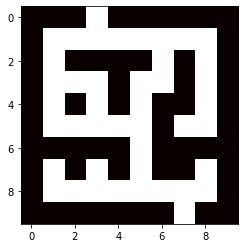

In [4]:
environment_rows = 10
environment_columns = 10
N = 10

q_values = np.zeros((4, environment_rows, environment_columns))
rewards = np.full((environment_rows, environment_columns), -100.)

maze = {} 
maze[0] = [3]
maze[1] = [i for i in range(1,9)]
maze[2] = [1, 6, 8]
maze[3] = [1, 2, 3, 5, 6, 8]
maze[4] = [1, 3, 5, 8]
maze[5] = [1, 2, 3, 4, 5, 7, 8]
maze[6] = [5]
maze[7] = [1, 3, 5, 8]
maze[8] = [i for i in range(1,9)]

for row_index in range(0,N-1):
    for column_index in maze[row_index]:
        rewards[row_index, column_index] = -1
rewards[9, 7] = 100
        
for row in rewards:
    print(row)
    
data = np.zeros((environment_columns, environment_rows))
for j in range(environment_rows):
    for i in range(environment_columns):
        if rewards[j][i] == -100:
            data[j][i] = 0
        else:
            data[j][i] = 1

plt.imshow(data, interpolation='nearest', cmap='hot')

Training complete!


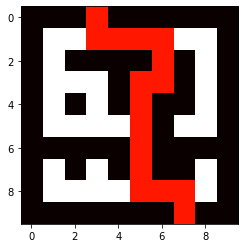

In [5]:
#define training parameters
discount_factor = 0.9
learning_rate = 0.9 
number_of_episodes = 2000
epsilon = 0.99
epsilon_decay = 0.999

min_epsilon = 0.01

sampling_frequency = 10

#image pixel data
original_data = data.copy()
data_array = np.zeros((environment_rows, environment_columns, int(number_of_episodes/sampling_frequency) ))

#metrics sotrage arrays
reward_array = []
episode_array_for_minmaxavg = []
min_reward_array = [] 
max_reward_array = []
avg_reward_array = []
number_of_steps_array = []
mean_q_values = []


for episode in range(number_of_episodes):
    row_index = 0
    column_index = 3 
    aggr_reward = 0
    number_of_steps = 0
    aggr_q_values = 0
    
    while not is_terminal_state(row_index, column_index):
        action_index = get_next_action(row_index, column_index, epsilon)
        old_row_index, old_column_index = row_index, column_index 
        row_index, column_index = get_next_location(old_row_index, old_column_index, action_index)
        reward = rewards[row_index, column_index]
        
        old_q_value = q_values[action_index, old_row_index, old_column_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[:,row_index, column_index])) - old_q_value
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[action_index, old_row_index, old_column_index] = new_q_value
        
        #metrics variables-------------------------------------------------------
        aggr_reward +=reward  
        number_of_steps += 1
        aggr_q_values += new_q_value
        #------------------------------------------------------------------------
        
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
        
    
    reward_array.append(aggr_reward)    
    number_of_steps_array.append(number_of_steps)
    if number_of_steps > 0:
        mean_q_values.append(aggr_q_values/number_of_steps)
    else:
        mean_q_values.append(0)
    
    if episode%sampling_frequency ==  0:
        index = int(episode / sampling_frequency)  
        draw_shortest_path()
        data_array[:,:,index] = data.copy()
        data = original_data.copy()
        
        average_reward = sum(reward_array[-sampling_frequency:])/sampling_frequency
        min_reward = min(reward_array[-sampling_frequency:])
        max_reward = max(reward_array[-sampling_frequency:])       
        #print("Index: ", index ,", Episode: ", episode,"Rewards-- min: ", min_reward ," max: ", max_reward, " avg: ", average_reward)

        episode_array_for_minmaxavg.append(episode)
        min_reward_array.append(min_reward)
        max_reward_array.append(max_reward)
        avg_reward_array.append(average_reward)

print('Training complete!')

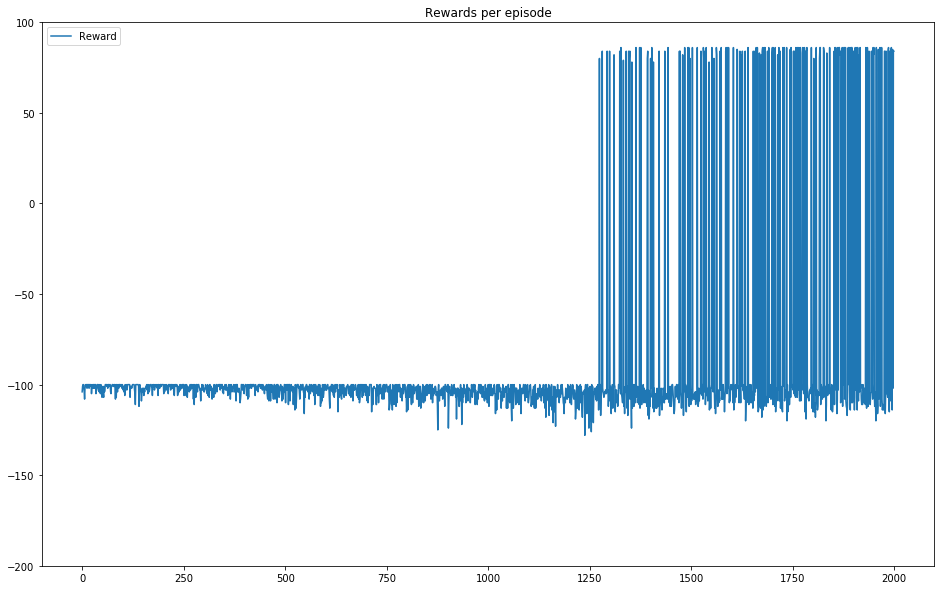

In [11]:
fig=plt.figure(figsize=(16, 10))
plt.plot(reward_array,  label="Reward" )
plt.ylim(-200, 100)
plt.title("Rewards per episode")
plt.legend(loc=2)
plt.show()

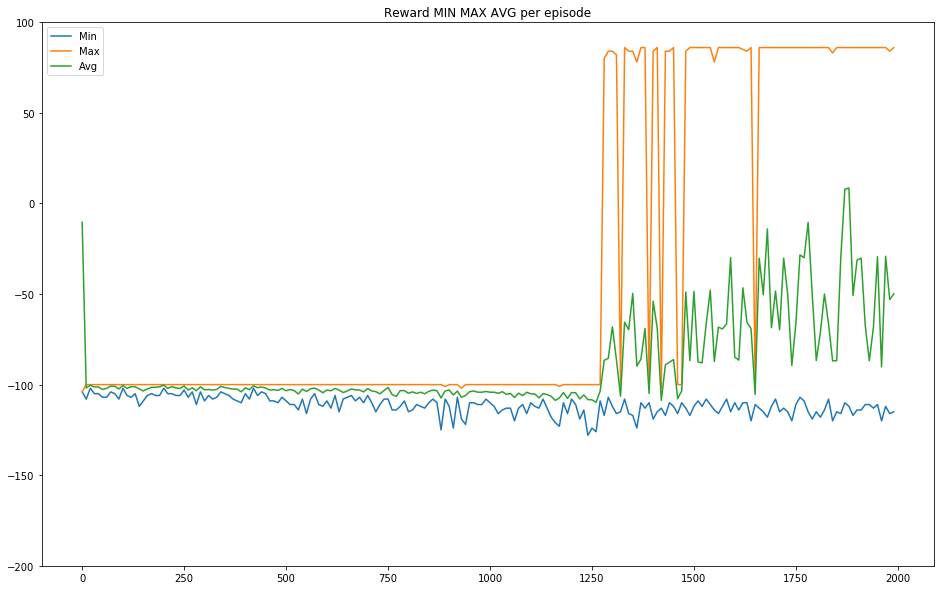

In [12]:
fig=plt.figure(figsize=(16, 10))
plt.plot(episode_array_for_minmaxavg, min_reward_array, label="Min" )
plt.plot(episode_array_for_minmaxavg, max_reward_array, label="Max" )
plt.plot(episode_array_for_minmaxavg, avg_reward_array, label="Avg" )
plt.title("Reward MIN MAX AVG per episode")
plt.ylim(-200, 100)
plt.legend(loc=2)
plt.show()

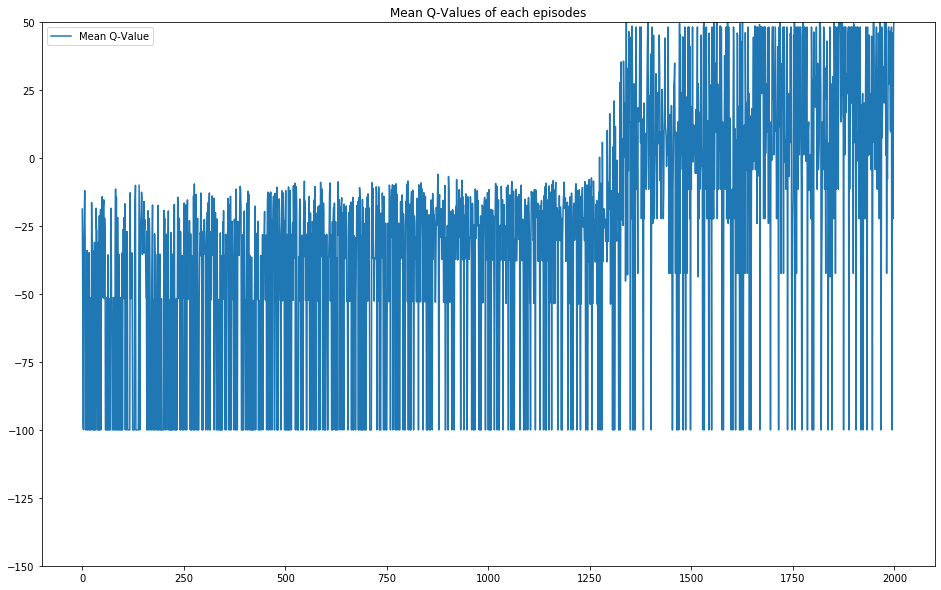

In [13]:
fig =plt.figure(figsize=(16, 10))
plt.plot(mean_q_values,  label="Mean Q-Value" )
plt.title("Mean Q-Values of each episodes")
plt.ylim(-150, 50)
plt.legend(loc=2)
plt.show()

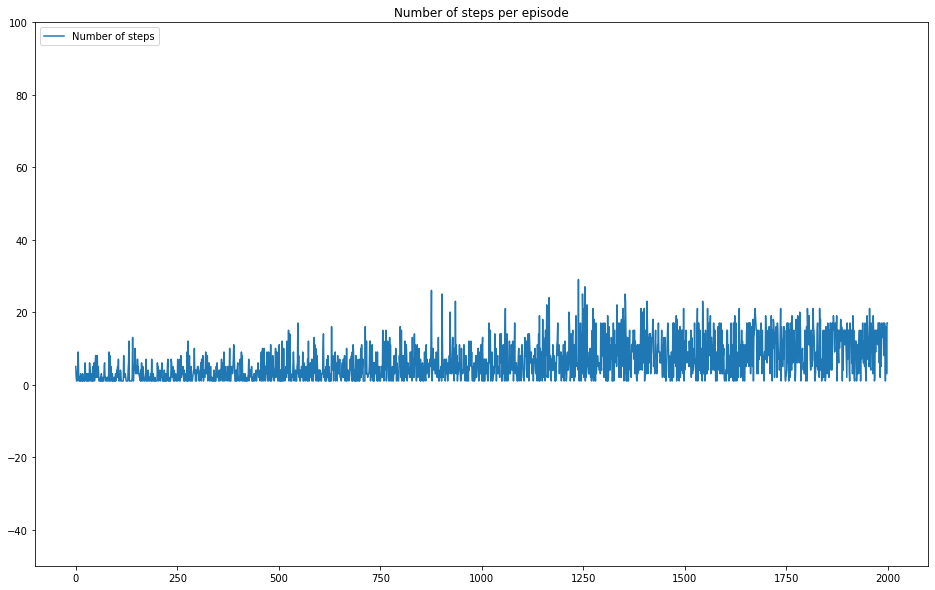

In [14]:
fig=plt.figure(figsize=(16, 10))
plt.plot(number_of_steps_array,  label="Number of steps" )
plt.title("Number of steps per episode")
plt.ylim(-50, 100)
plt.legend(loc=2)
plt.show()

In [ ]:
print(q_values)